In [1]:
import pathlib
import numpy as np
import scipy as sp
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches
import mplstereonet
import skimage.exposure
import harmonica as hm
import verde as vd

import zipfile
import os
import micromag as mg

import time
import warnings
import rich.progress

In [3]:
fig_dir = pathlib.Path("../..") / "paper" / "figures"

/tmp/ipykernel_441526/927571123.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


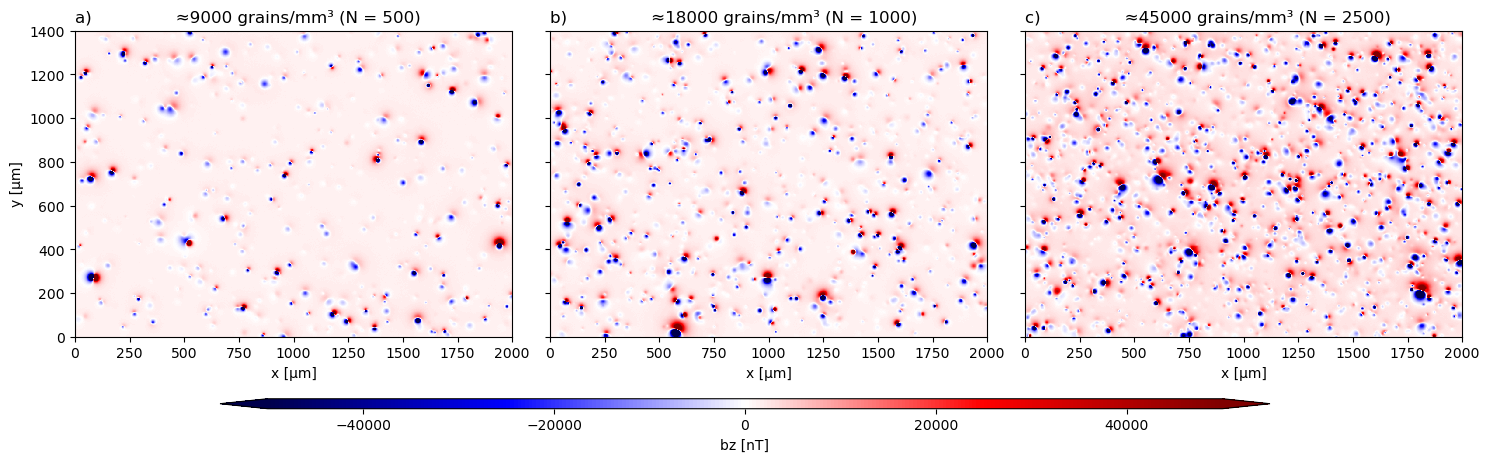

In [8]:
# Lista com os nomes das pastas contendo os arquivos NetCDF
folders = ["simulations_9k_grains_per_mm3", 
           "simulations_18k_grains_per_mm3",
           "simulations_45k_grains_per_mm3"]
titles = ["a)                ≈9000 grains/mm³ (N = 500)", 
          "b)                ≈18000 grains/mm³ (N = 1000)", 
          "c)                ≈45000 grains/mm³ (N = 2500)"]

# Criar figura para os subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
images = []
res = 2.0 # resolution µm/pixel
for i, (folder, title) in enumerate(zip(folders, titles)):
    # Procurar arquivos NetCDF dentro da pasta
    nc_files = [f for f in os.listdir(folder) if f.endswith(".nc")]
    
    if nc_files:
        nc_path = os.path.join(folder, nc_files[-3])  # Pega o terceiro último arquivo encontrado
        
        # Ler o NetCDF com xarray
        ds = xr.open_dataset(nc_path)

        # Criar coordenadas espaciais com base na resolução
        x = np.arange(ds.bz.shape[1]) * res  # Coordenadas x em µm
        y = np.arange(ds.bz.shape[0]) * res  # Coordenadas y em µm
        
        # Plotar pcolormesh com coordenadas ajustadas
        im = axes[i].pcolormesh(x, y, ds.bz, cmap="seismic", vmax=50000, vmin=-50000)
        # Plotar pcolormesh(data.bz)
        # im = axes[i].pcolormesh(ds.bz, cmap="seismic", vmax=50000, vmin=-50000)
        axes[i].set_title(title, loc='left')
        images.append(im)

        # Definir aspecto igual
        axes[i].set_aspect('equal')

# Adicionar colorbar compartilhado
cbar = fig.colorbar(images[0], ax=axes, extend='both', 
                    orientation='horizontal', fraction=0.09, pad=0.1,
                    cax=fig.add_axes([0.15, 0.05, 0.7, 0.02]))
cbar.set_label("bz [nT]")

# Definir rótulos dos eixos
axes[0].set_ylabel('y [µm]')
for ax in axes:
    ax.set_xlabel('x [µm]')

# Ajustar layout
plt.tight_layout()
fig.savefig(fig_dir / "synthetic-different-densities-maps.png", dpi=300, facecolor='w', bbox_inches='tight')

plt.show()